In [248]:
import cv2
import os
import pandas as pd
from PIL import Image, ImageFilter
import pytesseract

In [ ]:

img = Image.open("data/images/20171118200710_1.jpg")
img = im.filter( ImageFilter.SHARPEN )
w, h = img.size
p1_area = (570, 205, w-300, h-820)
p2_area = (570, 230, w-300, h-795)
p3_area = (570, 253, w-300, h-770)
p4_area = (570, 275, w-300, h-750)
p5_area = (570, 303, w-300, h-725)
p6_area = (570, 328, w-300, h-700)
p7_area = (570, 350, w-300, h-678)
p8_area = (570, 373, w-300, h-655)
p9_area = (570, 403, w-300, h-628)
p10_area = (570, 425, w-300, h-605)
p11_area = (570, 448, w-300, h-580)
p12_area = (570, 470, w-1065, h-560)

#get other 12 players
#parse victory/defeat
#top team is always the winner
cropped_img = img.crop(p12_area)
cropped_img.show()

In [251]:
#area rectangles for each player in score sheet
player_areas = [(570, 208, w-300, h-820), (570, 230, w-300, h-795), (570, 253, w-300, h-770),
                (570, 275, w-300, h-750), (570, 303, w-300, h-725), (570, 328, w-300, h-700),
                (570, 350, w-300, h-678), (570, 373, w-300, h-655), (570, 403, w-300, h-628), 
                (570, 425, w-300, h-605), (570, 448, w-300, h-580), (570, 470, w-300, h-560)]
def split_image(img=None, area=None, sharpen=True):
    """Takes an MWO team score image and splits it into 12 rectanges, 1 for each player's stats."""
    if img is not None and area is not None:
        #load image
        img = Image.open(img)
        if sharpen:
            #sharpen image
            img = im.filter(ImageFilter.SHARPEN)
        image_slices = []
        #crop image
        image_slice = img.crop(area)
        w, h = image_slice.size
        #get clan    x_start, y_start, x_end,   y_end
        clan_area = (0, 0, w-765, h)
        image_slices.append(image_slice.crop(clan_area))
        #get player name
        name_area = (50, 0, w-550, h)
        image_slices.append(image_slice.crop(name_area))
        #get mech
        mech_area = (265, 0, w-465, h)
        image_slices.append(image_slice.crop(mech_area))
        #get status
        status_area = (390, 0, w-350, h)
        image_slices.append(image_slice.crop(status_area))
        #get match score
        score_area = (500, 0, w-250, h)
        image_slices.append(image_slice.crop(score_area))
        #get kills
        kills_area = (590, 0, w-175, h)
        image_slices.append(image_slice.crop(kills_area))
        #get assists
        assist_area = (650, 0, w-120, h)
        image_slices.append(image_slice.crop(assist_area))
        #get damage
        dmg_area = (710, 0, w-40, h)
        image_slices.append(image_slice.crop(dmg_area))
        #get ping
        ping_area = (760, 0, w, h)
        image_slices.append(image_slice.crop(ping_area))
    else:
        print("No image or area selected")
    return image_slices

In [341]:
def pre_process(img=None, thresh=True, blur=True):
    if img:
        # load the example image and convert it to grayscale
        image = cv2.imread(img)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        if thresh:
            blur = False
            #thresholding requires grayscale image
            #"THRESH_TOZERO", cv2.THRESH_TOZERO
            #gray = cv2.threshold(gray, 0, 255,
            #    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
            thresh_val, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_TOZERO)
        # make a check to see if median blurring should be done to remove noise
        elif blur:
            gray = cv2.medianBlur(gray, 3)

        # write the grayscale image to disk as a temporary file so we can apply OCR to it
        cv2.imwrite("data/images_processed/temp.png", gray)
    else:
        print("Image must be specified")

In [342]:
def apply_ocr(img=None, num_only=True):
    # load the image as a PIL/Pillow image, apply OCR, and then delete the temporary file
    if img:
        image=Image.open(img)
        image.show()
        if num_only:
            text = pytesseract.image_to_string(Image.open(img), config='outputbase digits')
        else:
            text = pytesseract.image_to_string(Image.open(img)) 
        
        #os.remove(img)
    else:
        print("No image file specified.")
    return text

In [343]:

player_imgs = split_image("data/images/20171118200710_1.jpg", area=player_areas[0])
index = 0
for img in player_imgs:
    img.save('data/images_processed/temp_image_{}.jpg'.format(index), 'JPEG')
    index +=1

In [344]:
pre_process(img="data/images_processed/temp_image_5.jpg") #takes a single image
text = apply_ocr(img="data/images_processed/temp.png") #follows pre_process using the temp image written
text

''

In [299]:
#convert text to var
#get aggregates by match


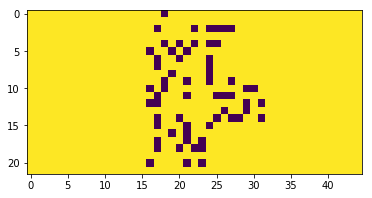

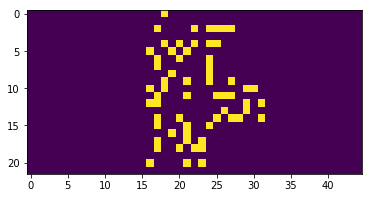

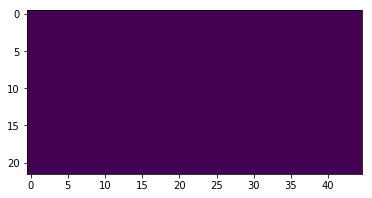

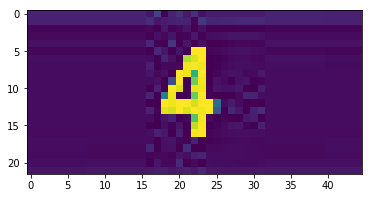

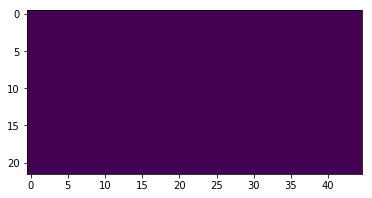

In [336]:
%matplotlib inline
from matplotlib import pyplot as plt
image = cv2.imread("data/images_processed/temp_image_5.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
methods = [
	("THRESH_BINARY", cv2.THRESH_BINARY),
	("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
	("THRESH_TRUNC", cv2.THRESH_TRUNC),
	("THRESH_TOZERO", cv2.THRESH_TOZERO),
	("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV)]
 
# loop over the threshold methods
for (threshName, threshMethod) in methods:
    # threshold the image and show it
    (T, thresh) = cv2.threshold(gray, 0, 255, threshMethod)
    cv2.imshow(threshName, thresh)
    plt.imshow(thresh)
    plt.show()

In [345]:
$ python ocr.py --image images/example_01.png

SyntaxError: invalid syntax (<ipython-input-345-e1145efd69ba>, line 1)